# PCD_Assignment02
Nama : [Finanazwa Ayesha]
NIM  : [24/532953/PA/22556]  

## Implementation of Image Enhancement (Blurred, Dark, Bright, Low-Contrast)

Saving blairpcd.jpg to blairpcd.jpg


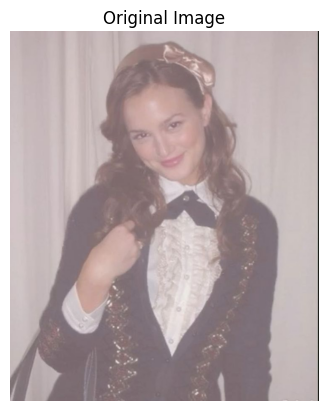

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Baca gambar
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convolution
def convolution(image, kernel):
    k = kernel.shape[0] // 2
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    output = np.zeros_like(gray)

    for x in range(k, gray.shape[0]-k):
        for y in range(k, gray.shape[1]-k):
            region = gray[x-k:x+k+1, y-k:y+k+1]
            value = np.sum(region * kernel)
            output[x,y] = np.clip(value, 0, 255)
    return output

# show image

def show_image(title, img, cmap_type=None):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

def compare(img1, img2, title1="Image 1", title2="Image 2"):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(title2)
    plt.axis("off")

    plt.show()

show_image("Original Image", image_rgb)

# Mean Filter

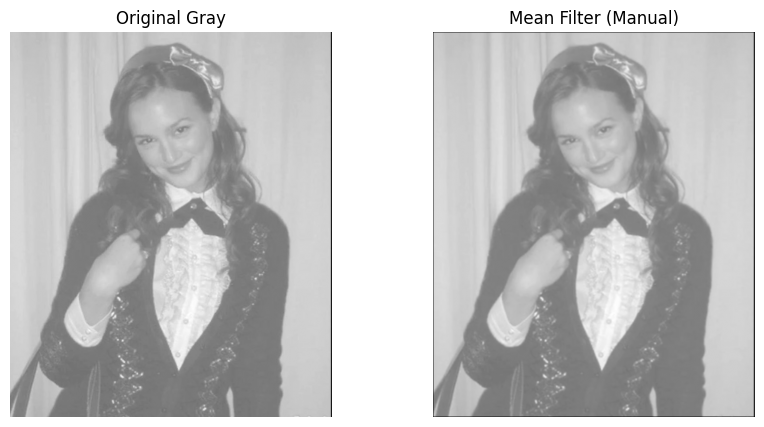

In [38]:
mean_kernel = np.ones((3,3), np.float32) / 9
mean_manual = convolution(image_rgb, mean_kernel)

compare(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY),
        mean_manual,
        "Original Gray",
        "Mean Filter (Manual)")

Goal: Softening the picture and delete random noise

The mean filter was applied using a 3x3 3×3 kernel where each value is equal to 1/9. This filter works by replacing each pixel with the average value of its neighborhood. As a result, the processed image appears smoother, but fine details and sharp edges are blurred. This shows how the mean filter effectively reduces random noise but also sacrifices image sharpness.

# Gaussian Filter

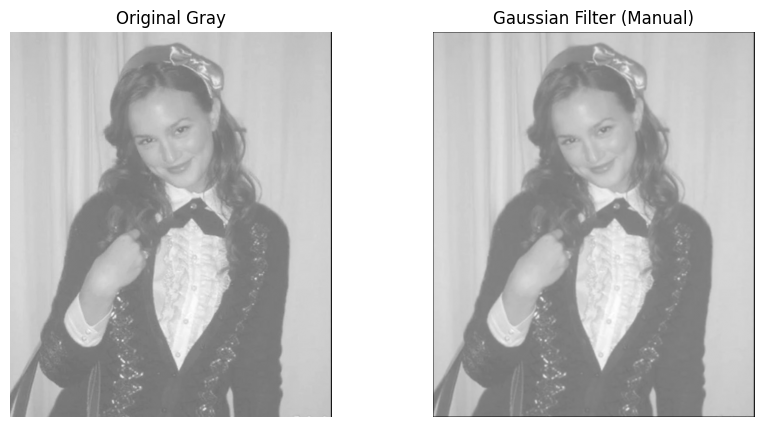

In [39]:
gaussian_kernel = (1/16) * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
gaussian_manual = convolution(image_rgb, gaussian_kernel)

compare(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY), gaussian_manual,
        "Original Gray", "Gaussian Filter (Manual)")

In this experiment, we use Gaussian filter, which is a common approximation of the Gaussian distribution. The grayscale image on the left represents the original input without any processing, while the image on the right shows the result after convolution with the Gaussian kernel. From the comparison, it can be observed that the filtered image appears smoother, especially in areas with fine textures and small details such as the road surface and building edges. The Gaussian filter effectively reduces high-frequency components and noise, resulting in a softer appearance. At the same time, the main structures and larger features of the scene, such as the buildings, vehicles, and overall perspective of the street, are preserved. This demonstrates the main characteristic of Gaussian filtering: balancing noise reduction with edge preservation. The output highlights how Gaussian filtering is useful as a preprocessing step in image processing tasks where noise suppression is needed before applying further operations like edge detection or segmentation.

# Sharpening Filter

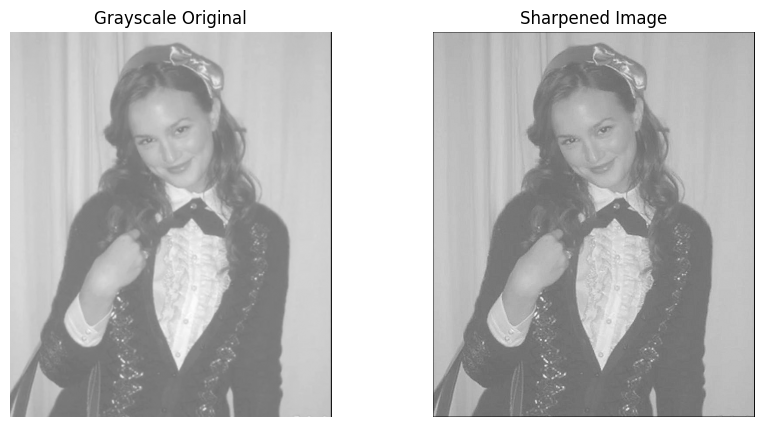

In [40]:

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened_image = convolution(image_rgb, sharpen_kernel)
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

compare(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY),
        sharpened_image,
        "Grayscale Original",
        "Sharpened Image")

The sharpening filter was implemented with a kernel that emphasizes the center pixel while subtracting its neighbors. This operation enhances the edges and fine details in the image, making features like hair and facial outlines appear more distinct. Compared to the original grayscale image, the sharpened version has stronger contrast along edges, but it may also increase noise or make the image look slightly harsher if overapplied.

# Median Filter (Noise Removal)

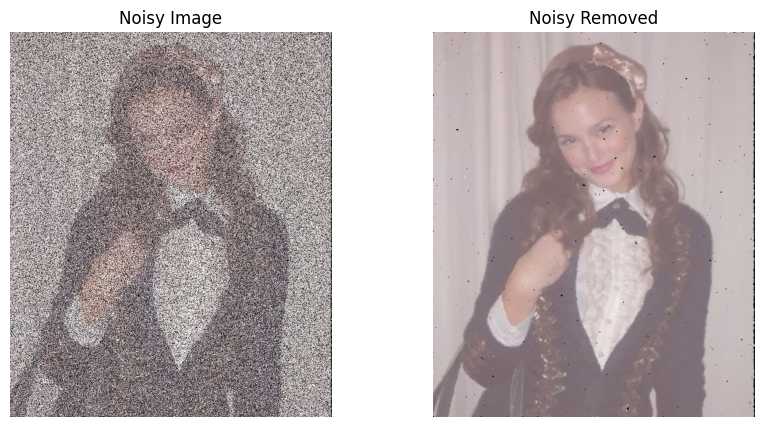

In [42]:
def add_salt_pepper_noise(image, amount=0.05):
    noisy = image.copy()
    h, w, c = image.shape

    num_noise = int(amount * h * w)

    for _ in range(num_noise // 2):
        x = np.random.randint(0, h)
        y = np.random.randint(0, w)
        noisy[x, y] = [255, 255, 255]

    for _ in range(num_noise // 2):
        x = np.random.randint(0, h)
        y = np.random.randint(0, w)
        noisy[x, y] = [0, 0, 0]

    return noisy

noisy_img = add_salt_pepper_noise(image_rgb, amount=0.5)

# remove
removal = cv2.medianBlur(noisy_img, 5)

# Bandingin
compare(noisy_img, removal, "Noisy Image", "Noisy Removed")

Salt and pepper noise was artificially added to the original image, and then a median filter was applied to remove it. The median filter works by replacing each pixel with the median value of its neighborhood, which is highly effective for eliminating impulsive noise. As shown in the results, most of the noise is removed, and the main structures of the face and clothing are restored. Compared to the mean filter, the median filter preserves edges better while still reducing noise.

# Darkening

Saving toobright.jpg to toobright.jpg


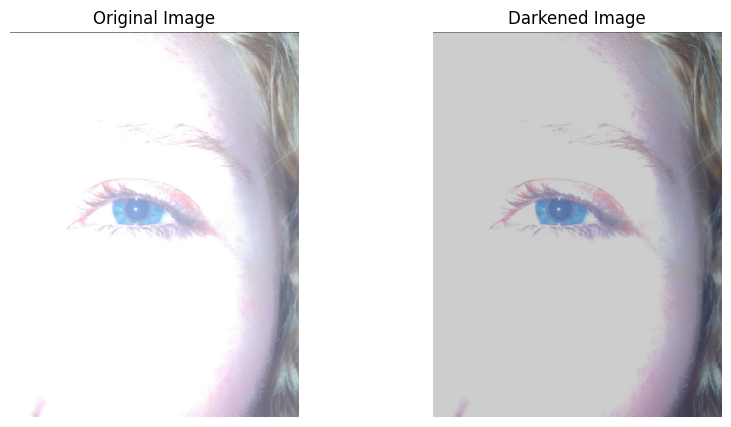

In [48]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

image_dark = cv2.imread(filename)
image_dark = cv2.cvtColor(image_dark, cv2.COLOR_BGR2RGB)

dark_img = cv2.convertScaleAbs(image_dark, alpha=1, beta=-50)

compare(image_dark, dark_img,
        "Original Image", "Darkened Image")

alpha=1 keeps the contrast unchanged, while beta=-50 decreases brightness by subtracting intensity values from every pixel. As shown in the result, the image becomes darker overall, with less visibility in shadow regions. While the overall content is still visible, details in darker regions may become harder to distinguish. Darkening can be useful in applications such as simulating low-light conditions or reducing overexposed areas.

# Brightening

Saving toodark.jpg to toodark.jpg


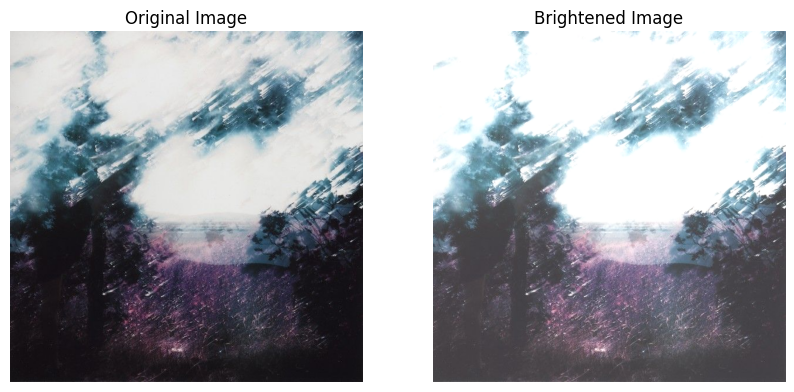

In [49]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

image_bright = cv2.imread(filename)
image_bright = cv2.cvtColor(image_bright, cv2.COLOR_BGR2RGB)

bright_img = cv2.convertScaleAbs(image_bright, alpha=1, beta=50)

compare(image_bright, bright_img,
        "Original Image", "Brightened Image")

The result is a lighter version of the image where previously darker areas become more visible. However, excessive brightening may cause overexposure, where some bright regions lose their detail. Brightening was achieved by increasing the intensity of all pixels with a positive beta value.

# Contrast Enhancement

In [46]:
# function to compare 3 image
def compare3(img1, img2, img3, title1="Image 1", title2="Image 2", title3="Image 3"):
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img1, cmap="gray" if len(img1.shape)==2 else None)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(img2, cmap="gray" if len(img2.shape)==2 else None)
    plt.title(title2)
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(img3, cmap="gray" if len(img3.shape)==2 else None)
    plt.title(title3)
    plt.axis("off")

    plt.show()


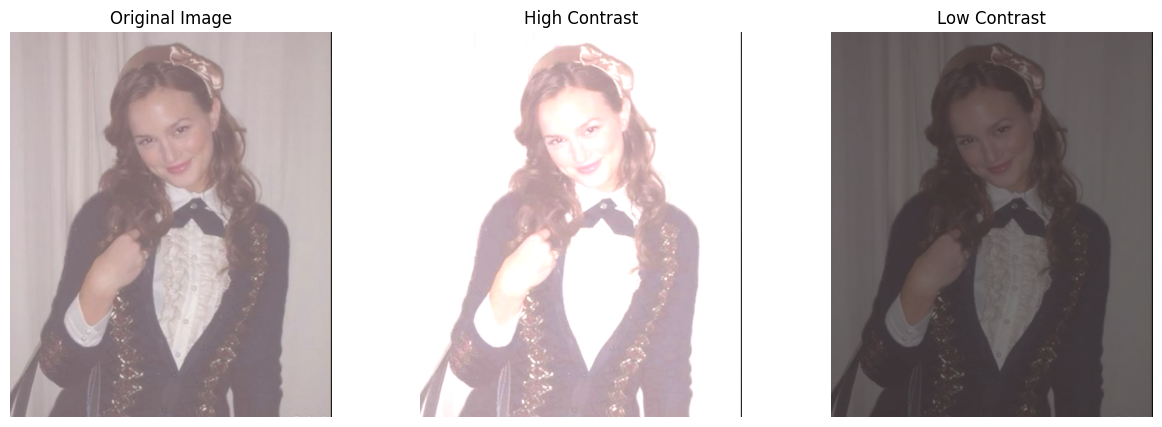

In [47]:
high_contrast_img = cv2.convertScaleAbs(image_rgb, alpha=1.5, beta=0)

low_contrast_img = cv2.convertScaleAbs(image_rgb, alpha=0.5, beta=0)

compare3(image_rgb, high_contrast_img, low_contrast_img,
         "Original Image", "High Contrast", "Low Contrast")

Contrast enhancement was applied by scaling pixel intensity values.

* High Contrast: highlights edges and details but may exaggerate noise.

* Low Contrast: produces a flatter and duller image, often reducing visibility of key features.


